In [1]:
import numpy as np
import torch
import os
from utils.utils_dataset import prepare_k_fold_non_iid_dataset, prepare_k_fold_federated_dataset
from sklearn.model_selection import KFold
from utils.utils_train import train_unsupervised, test_model
from utils.utils_plots import plot_first_feature_horizontal, save_figure
from utils.utils_metrics import calculate_metrics_statistics, calculate_cluster_stats, calculate_unsupervised_metrics

In [2]:
from model.eFedGauss import eFedGauss

print("PyTorch Version:", torch.__version__)
print("CUDA Version:", torch.version.cuda)

# Check if CUDA is available
#if torch.cuda.is_available():
#    device = torch.device("cuda")
#    print("CUDA is available. Using GPU.")
#else:
device = torch.device("cpu")
print("Using CPU")

# Model parameters
local_model_params = {
    "feature_dim": 2,
    "num_classes": 3,
    "kappa_n": 1,
    "num_sigma": 2,
    "kappa_join": 0.5,
    "S_0": 1e-8,
    "N_r": 8,
    "c_max": 10000,
    "device": device
}
federated_model_params = {
    "feature_dim": 2,
    "num_classes": 3,
    "kappa_n": 1,
    "num_sigma": 3,
    "kappa_join": 0.9,
    "S_0": 1e-8,
    "N_r": 8,
    "c_max": 10000,
    "device": device
}

PyTorch Version: 2.2.0
CUDA Version: 11.8
Using CPU


In [3]:
# Generate the data as provided

z_1_top = 1*np.random.randn(1, 200)
z_1 = np.vstack((z_1_top, z_1_top + (0.8 * np.random.randn(1, 200))))
z_2_top = np.random.randn(1, 200)
z_2 = np.vstack((z_2_top, -z_2_top + (8 + 0.85 * np.random.randn(1, 200))))
z_3_top = -1.5 + 0.5 * np.random.randn(1, 200)
z_3 = np.vstack((z_3_top, -z_3_top + (4 + 0.5 * np.random.randn(1, 200))))

labels_1 = 0*np.ones((z_1.shape[1],), dtype=np.int32)  # Label 0 for z_1 cluster
labels_2 = 1*np.ones((z_2.shape[1],), dtype=np.int32)  # Label 1 for z_2 cluster
labels_3 = 2*np.ones((z_3.shape[1],), dtype=np.int32)  # Label 2 for z_3 cluster

# Concatenate the data and labels
z = np.hstack((z_1, z_2, z_3))
labels = np.hstack((labels_1, labels_2, labels_3))

# Shuffle the data and labels in the same order
indices = np.random.permutation(z.shape[1])
data = z[:, indices].transpose()
labels = labels[indices]


Experiment with 1 clients and 100% data per client
Repetition 1/1 for 1 clients and 100% data
*** Repetition 1/1. Start of fold 0 for 1 clients and 100% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 18
Updated var_glo values: tensor(1.2008)
Number of clusters after merging = 10
Evolving has been disabled.
*** Repetition 1/1. Start of fold 1 for 1 clients and 100% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 21
Updated var_glo values: tensor(1.1802)
Number of clusters after merging = 10
Evolving has been disabled.
*** Repetition 1/1. Start of fold 2 for 1 clients and 100% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 14
Updated var_glo values: tensor(1.1774)
Number of clusters after merging = 7


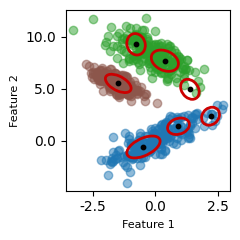

Evolving has been disabled.

Experiment with 3 clients and 10.0% data per client
Repetition 1/1 for 3 clients and 10.0% data
*** Repetition 1/1. Start of fold 0 for 3 clients and 10.0% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 7
Training model for client 2
Evolving has been enabled.
Number of clusters with multiple samples for Client 2 = 8
Training model for client 3
Evolving has been enabled.
Number of clusters with multiple samples for Client 3 = 9
Updated var_glo values: tensor(1.1935)
Updated var_glo values: tensor(1.0931)
Updated var_glo values: tensor(1.3317)
Number of clusters after merging = 8
Evolving has been disabled.
*** Repetition 1/1. Start of fold 1 for 3 clients and 10.0% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 9
Training model for client 2
Evolving has been enabled.
Number of clusters with mu

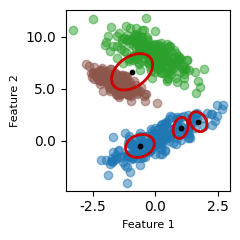

Evolving has been disabled.

Experiment with 3 clients and 20.0% data per client
Repetition 1/1 for 3 clients and 20.0% data
*** Repetition 1/1. Start of fold 0 for 3 clients and 20.0% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 14
Training model for client 2
Evolving has been enabled.
Number of clusters with multiple samples for Client 2 = 12
Training model for client 3
Evolving has been enabled.
Number of clusters with multiple samples for Client 3 = 13
Updated var_glo values: tensor(0.9410)
Updated var_glo values: tensor(1.0089)
Updated var_glo values: tensor(1.1116)
Number of clusters after merging = 16
Evolving has been disabled.
*** Repetition 1/1. Start of fold 1 for 3 clients and 20.0% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 12
Training model for client 2
Evolving has been enabled.
Number of clusters wi

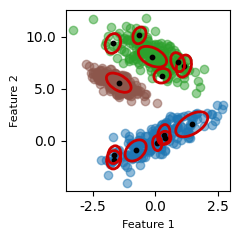

Evolving has been disabled.

Experiment with 3 clients and 33.0% data per client
Repetition 1/1 for 3 clients and 33.0% data
*** Repetition 1/1. Start of fold 0 for 3 clients and 33.0% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 15
Training model for client 2
Evolving has been enabled.
Number of clusters with multiple samples for Client 2 = 13
Training model for client 3
Evolving has been enabled.
Number of clusters with multiple samples for Client 3 = 15
Updated var_glo values: tensor(0.9926)
Updated var_glo values: tensor(1.1319)
Updated var_glo values: tensor(1.1390)
Number of clusters after merging = 16
Evolving has been disabled.
*** Repetition 1/1. Start of fold 1 for 3 clients and 33.0% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 15
Training model for client 2
Evolving has been enabled.
Number of clusters wi

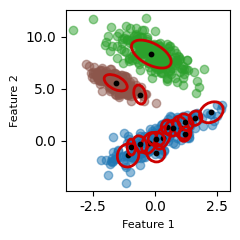

Evolving has been disabled.

Experiment with 5 clients and 10.0% data per client
Repetition 1/1 for 5 clients and 10.0% data
*** Repetition 1/1. Start of fold 0 for 5 clients and 10.0% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 11
Training model for client 2
Evolving has been enabled.
Number of clusters with multiple samples for Client 2 = 7
Training model for client 3
Evolving has been enabled.
Number of clusters with multiple samples for Client 3 = 10
Training model for client 4
Evolving has been enabled.
Number of clusters with multiple samples for Client 4 = 10
Training model for client 5
Evolving has been enabled.
Number of clusters with multiple samples for Client 5 = 9
Updated var_glo values: tensor(0.9530)
Updated var_glo values: tensor(1.1066)
Updated var_glo values: tensor(1.1614)
Updated var_glo values: tensor(1.2339)
Updated var_glo values: tensor(1.2256)
Number of clusters after merging

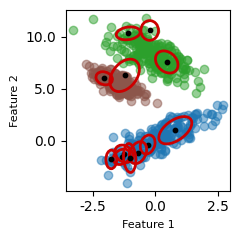

Evolving has been disabled.

Experiment with 10 clients and 10.0% data per client
Repetition 1/1 for 10 clients and 10.0% data
*** Repetition 1/1. Start of fold 0 for 10 clients and 10.0% data per client ***
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 12
Training model for client 2
Evolving has been enabled.
Number of clusters with multiple samples for Client 2 = 8
Training model for client 3
Evolving has been enabled.
Number of clusters with multiple samples for Client 3 = 10
Training model for client 4
Evolving has been enabled.
Number of clusters with multiple samples for Client 4 = 8
Training model for client 5
Evolving has been enabled.
Number of clusters with multiple samples for Client 5 = 8
Training model for client 6
Evolving has been enabled.
Number of clusters with multiple samples for Client 6 = 10
Training model for client 7
Evolving has been enabled.
Number of clusters with multiple samples for Client 7 = 

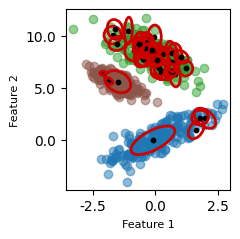

Evolving has been disabled.


In [4]:
X = data
y = labels
num_splits = 3

# Define the configurations for the experiment
num_clients_options = [1, 3, 5, 10]  # Number of clients
data_percentage_options = [0.1, 0.2, 0.33, 1]  # Percentage of data for each client

# Define the specific configurations of interest
specific_configurations = [
    (1, 1), 
    (3, 0.10), (5, 0.10), (10, 0.10),  # 10% data for 3, 5, and 10 clients
    (3, 0.20), (3, 0.33)              # 20% and 33% data for 3 clients
]

# Placeholder for results
experiment_results = []

# Number of repetitions for each configuration
num_repetitions = 1

# Loop over the different configurations
for num_clients in num_clients_options:
    for data_percentage in data_percentage_options:
        if (num_clients, data_percentage) in specific_configurations:
            print(f"\nExperiment with {num_clients} clients and {data_percentage*100}% data per client")

            # Initialize result containers for this configuration
            config_results = {
                "client_clusters": [],
                "aggregated_clusters": [],
                "federated_metrics": [],
                "federated_clusters": [],
                "num_of_samples": []
            }

            for repetition in range(num_repetitions):
                print(f"Repetition {repetition + 1}/{num_repetitions} for {num_clients} clients and {data_percentage*100}% data")

                kf = KFold(n_splits=num_splits, shuffle=True, random_state=None)  

                # Initialize arrays to track samples per class for each client in each fold
                samples_per_class_per_client = np.zeros((num_clients, local_model_params["num_classes"], num_splits))

                # Main loop for k-fold cross-validation
                #all_client_metrics = [[] for _ in range(num_clients)]
                all_client_clusters = [[] for _ in range(num_clients)]
                all_agregated_clusters = []
                all_federated_metrics = []
                all_federated_clusters = []

                # K-Fold Cross-Validation
                for i_fold, (train_index, test_index) in enumerate(kf.split(data)):
                    print(f"*** Repetition {repetition + 1}/{num_repetitions}. Start of fold {i_fold} for {num_clients} clients and {data_percentage*100}% data per client ***")

                    # Split the data based on the current configuration
                    train_data, test_data, all_data = prepare_k_fold_federated_dataset(
                        X, y, train_index, test_index, num_clients, data_percentage)
                    
                    local_models = [eFedGauss(**local_model_params) for _ in range(num_clients)]
                    federated_model = eFedGauss(**federated_model_params)

                    #federated_model.toggle_debugging(True)
                    
                    #Train the models
                    for client_idx, client_model in enumerate(local_models):
                        #client_model.toggle_debugging(True)

                        # Count the number of samples per class for this client in this fold
                        for class_idx in range(client_model.num_classes):
                            class_samples = torch.sum(train_data[client_idx][1] == class_idx)
                            samples_per_class_per_client[client_idx, class_idx, i_fold] = class_samples

                        #unsupervised clustering
                        print(f"Training model for client {client_idx + 1}")
                        train_unsupervised(client_model, train_data[client_idx]) 

                        #Test the local models

                        #Save the number of clusters
                        num_client_clusters = torch.sum(client_model.n[:client_model.c] > 1).item()
                        print(f"Number of clusters with multiple samples for Client {client_idx + 1} = {num_client_clusters}")
                        all_client_clusters[client_idx].append(num_client_clusters)

                    #Aggregate local models
                    for client_idx, client_model in enumerate(local_models):
                        federated_model.federal_agent.merge_model_privately(client_model, n_min=federated_model.kappa_n, pred_min=0)
                        num_agregated_clusters = torch.sum(federated_model.n[:federated_model.c] > 1).item()
                        all_agregated_clusters.append(num_agregated_clusters)

                    #Merge the federated model clusters
                    #print(f"\nNumber of clusters after transfer = {federated_model.c}")
                    federated_model.federal_agent.federated_merging()

                    num_federated_clusters = torch.sum(federated_model.n[:federated_model.c] > 1).item()
                    print(f"Number of clusters after merging = {federated_model.c}")
                    all_federated_clusters.append(num_federated_clusters)
                    
                    #Plot the Aggregated model
                    '''
                    if num_clients == 3 and  data_percentage == 0.33 and i_fold == (num_splits-1):
                        fig = plot_first_feature_horizontal(all_data, model=federated_model, num_sigma=2, N_max=1 title="Aggregated models")   
                        save_figure(fig, "Images/synthetic_federated_pre_merge.svg","svg")
                        save_figure(fig, "Images/synthetic_federated_pre_merge.pdf","pdf")
                    '''
                    if repetition == num_repetitions-1 and i_fold == (num_splits-1): 
                        fig = plot_first_feature_horizontal(all_data, model=federated_model, num_sigma=2, N_max=1, title="")  
                        
                    #Test the federated model
                    #calculate_unsupervised_metrics()
                    _,_, cluster_assignment = test_model(federated_model, test_data)

                    federated_metrics = calculate_unsupervised_metrics(cluster_assignment.cpu(), test_data)
                    #num_params = federated_model.c*(federated_model.feature_dim**2 + federated_model.feature_dim +1)
                    #bic = compute_bic(cluster_assignment.detach().numpy(), num_params)
                    all_federated_metrics.append(federated_metrics)
                    #all_federated_bic.append(bic)
                    
                # Collect results for this repetition
                config_results["client_clusters"].append(all_client_clusters)
                config_results["aggregated_clusters"].append(all_agregated_clusters)
                config_results["federated_metrics"].append(all_federated_metrics)
                config_results["federated_clusters"].append(all_federated_clusters)
                config_results["num_of_samples"].append(samples_per_class_per_client)

            # After all repetitions, append the summarized results
            experiment_results.append({
                "num_clients": num_clients,
                "data_percentage": data_percentage,
                **config_results
            })


Non-IID Experiment with 3 clients and 33.0% data per client
Repetition 1/1 for 3 clients and 33.0% data
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 19
Training model for client 2
Evolving has been enabled.
Number of clusters with multiple samples for Client 2 = 11
Training model for client 3
Evolving has been enabled.
Number of clusters with multiple samples for Client 3 = 16
Updated var_glo values: tensor(0.8548)
Updated var_glo values: tensor(1.0931)
Updated var_glo values: tensor(1.0726)
Number of clusters after merging = 19
Evolving has been disabled.
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 13
Training model for client 2
Evolving has been enabled.
Number of clusters with multiple samples for Client 2 = 13
Training model for client 3
Evolving has been enabled.
Number of clusters with multiple samples for Client 3 = 16
Updated var_glo values: tens

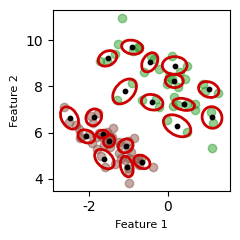

Figure saved as .Images/synthetic_local_model_1.svg in svg format.
Figure saved as .Images/synthetic_local_model_1.pdf in pdf format.
Updated var_glo values: tensor(1.2489)


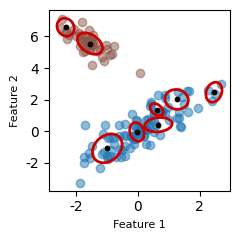

Figure saved as .Images/synthetic_local_model_2.svg in svg format.
Figure saved as .Images/synthetic_local_model_2.pdf in pdf format.
Updated var_glo values: tensor(1.2556)


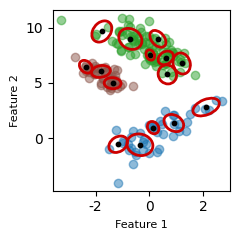

Figure saved as .Images/synthetic_local_model_3.svg in svg format.
Figure saved as .Images/synthetic_local_model_3.pdf in pdf format.


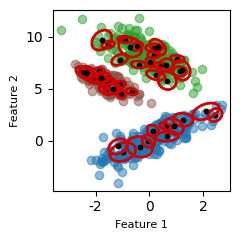

Figure saved as .Images/synthetic_federated_pre_merge.svg in svg format.
Figure saved as .Images/synthetic_federated_pre_merge.pdf in pdf format.
Number of clusters after merging = 17


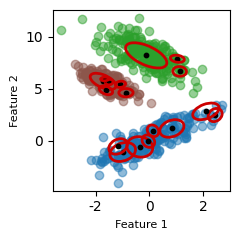

Figure saved as .Images/synthetic_federated.svg in svg format.
Figure saved as .Images/synthetic_federated.pdf in pdf format.
Evolving has been disabled.

Non-IID Experiment with 5 clients and 20.0% data per client
Repetition 1/1 for 5 clients and 20.0% data
Training model for client 1
Evolving has been enabled.
Number of clusters with multiple samples for Client 1 = 12
Training model for client 2
Evolving has been enabled.
Number of clusters with multiple samples for Client 2 = 12
Training model for client 3
Evolving has been enabled.
Number of clusters with multiple samples for Client 3 = 13
Training model for client 4
Evolving has been enabled.
Number of clusters with multiple samples for Client 4 = 16
Training model for client 5
Evolving has been enabled.
Number of clusters with multiple samples for Client 5 = 14
Updated var_glo values: tensor(1.0062)
Updated var_glo values: tensor(1.2098)
Updated var_glo values: tensor(1.2322)
Updated var_glo values: tensor(1.1773)
Updated var_glo

In [5]:
# Non IID experiment
# Define the specific configurations of interest
specific_configurations = [
    (3, 0.33), (5, 0.20), (10, 0.10),  # 10% data for 3, 5, and 10 clients
]

experiment_non_iid_results = []

os.makedirs(".Images", exist_ok=True)  # Create the directory to save the images if it doesn't exist

# Loop over the different configurations
for num_clients in num_clients_options:
    for data_percentage in data_percentage_options:
        if (num_clients, data_percentage) in specific_configurations:
            print(f"\nNon-IID Experiment with {num_clients} clients and {data_percentage*100}% data per client")

            # Initialize result containers for this configuration
            config_results = {
                "client_clusters": [],
                "aggregated_clusters": [],
                "federated_metrics": [],
                "federated_clusters": [],
                "num_of_samples": []
            }

            for repetition in range(num_repetitions):
                print(f"Repetition {repetition + 1}/{num_repetitions} for {num_clients} clients and {data_percentage*100}% data")

                # Main loop for k-fold cross-validation
                #all_client_metrics = [[] for _ in range(num_clients)]
                all_client_clusters = [[] for _ in range(num_clients)]
                all_agregated_clusters = []
                all_federated_metrics = []
                all_federated_clusters = []

                # Initialize K-Fold outside the repetition loop
                kf = KFold(n_splits=num_splits, shuffle=True, random_state=None)  

                # Initialize arrays to track samples per class for each client in each fold
                samples_per_class_per_client = np.zeros((num_clients, local_model_params["num_classes"], num_splits))

                # K-Fold Cross-Validation for each repetition
                for i_fold, (train_index, test_index) in enumerate(kf.split(data)):

                    # Split the data based on the current configuration
                    train_data, test_data, all_data = prepare_k_fold_non_iid_dataset(
                        X, y, train_index, test_index, num_clients)
                    
                    #Create the models
                    local_models = [eFedGauss(**local_model_params) for _ in range(num_clients)]
                    federated_model = eFedGauss(**federated_model_params)
                    #federated_model.toggle_debugging(True)
                    
                    #Train the models
                    for client_idx, client_model in enumerate(local_models):
                        #client_model.toggle_debugging(True)

                        # Count the number of samples per class for this client in this fold
                        for class_idx in range(client_model.num_classes):
                            class_samples = torch.sum(train_data[client_idx][1] == class_idx)
                            samples_per_class_per_client[client_idx, class_idx, i_fold] = class_samples

                        #unsupervised clustering
                        print(f"Training model for client {client_idx + 1}")
                        train_unsupervised(client_model, train_data[client_idx]) 

                        #Test the local models

                        #Save the number of clusters
                        num_client_clusters = torch.sum(client_model.n[:client_model.c] > 1).item()
                        print(f"Number of clusters with multiple samples for Client {client_idx + 1} = {num_client_clusters}")
                        all_client_clusters[client_idx].append(num_client_clusters)

                    #Aggregate local models
                    for client_idx, client_model in enumerate(local_models):
                        federated_model.federal_agent.merge_model_privately(client_model, n_min=1, pred_min=0)
                        num_agregated_clusters = torch.sum(federated_model.n[:federated_model.c] > 1).item()
                        all_agregated_clusters.append(num_agregated_clusters)

                        #Plot local models
                        
                        if repetition == (num_repetitions-1) and num_clients == 3 and  data_percentage == 0.33 and i_fold == (num_splits-1):
                                
                            #Plot the local models
                            fig = plot_first_feature_horizontal(train_data[client_idx], model=client_model, num_sigma=2, N_max=1, title="", format="%d")  #f"Local model {client_idx+1}"
                            save_figure(fig, f".Images/synthetic_local_model_{client_idx+1}.svg", "svg")
                            save_figure(fig, f".Images/synthetic_local_model_{client_idx+1}.pdf","pdf")
                        

                    #Plot the Aggregated model
                    if repetition == (num_repetitions-1) and num_clients == 3 and  data_percentage == 0.33 and i_fold == (num_splits-1):
                        fig = plot_first_feature_horizontal(all_data, model=federated_model, num_sigma=2, N_max=1, title="", format="%.0f")   
                        save_figure(fig, ".Images/synthetic_federated_pre_merge.svg","svg")
                        save_figure(fig, ".Images/synthetic_federated_pre_merge.pdf","pdf")
                    
                    #Merge the federated model clusters
                    #print(f"\nNumber of clusters after transfer = {federated_model.c}")
                    federated_model.federal_agent.federated_merging()
                    num_federated_clusters = torch.sum(federated_model.n[:federated_model.c] > 1).item()
                    print(f"Number of clusters after merging = {federated_model.c}")
                    all_federated_clusters.append(num_federated_clusters)
                    
                    #Plot the Aggregated model
                    if repetition == (num_repetitions-1) and num_clients == 3 and  data_percentage == 0.33 and i_fold == (num_splits-1):
                        fig = plot_first_feature_horizontal(all_data, model=federated_model, num_sigma=2, N_max=1, title="", format="%.0f")   
                        save_figure(fig, ".Images/synthetic_federated.svg","svg")
                        save_figure(fig, ".Images/synthetic_federated.pdf","pdf")
                        
                    #Test the federated model
                    #calculate_unsupervised_metrics()
                    _,_, cluster_assignment = test_model(federated_model, test_data)

                    federated_metrics = calculate_unsupervised_metrics(cluster_assignment.cpu(), test_data)
                    #num_params = federated_model.c*(federated_model.feature_dim**2 + federated_model.feature_dim +1)
                    #bic = compute_bic(cluster_assignment.detach().numpy(), num_params)
                    all_federated_metrics.append(federated_metrics)
                    #all_federated_bic.append(bic)
                    
                # Collect results for this repetition
                config_results["client_clusters"].append(all_client_clusters)
                config_results["aggregated_clusters"].append(all_agregated_clusters)
                config_results["federated_metrics"].append(all_federated_metrics)
                config_results["federated_clusters"].append(all_federated_clusters)
                config_results["num_of_samples"].append(samples_per_class_per_client)

            # After all repetitions, append the summarized results
            experiment_non_iid_results.append({
                "num_clients": num_clients,
                "data_percentage": data_percentage,
                **config_results
            })

In [6]:
#Aditional plots of the data
'''
display_dataset_split(train_data, test_data)
fig = plot_dataset_split(train_data, test_data)
save_figure(fig, "Images/synthetic_data_distribution.svg","svg")
save_figure(fig, "Images/synthetic_data_distribution.pdf","pdf")
'''

'\ndisplay_dataset_split(train_data, test_data)\nfig = plot_dataset_split(train_data, test_data)\nsave_figure(fig, "Images/synthetic_data_distribution.svg","svg")\nsave_figure(fig, "Images/synthetic_data_distribution.pdf","pdf")\n'

In [7]:
# Define the LaTeX table header and footer
table_header = r'''\begin{table}[ht]
\centering
\setlength{\tabcolsep}{3pt}
\scriptsize
\caption{Unsupervised Clustering for Different Client Data Distributions}
\begin{tabular}{lcccccc}
\toprule
\textbf{\#Clients/Data}&\textbf{\#Local$\downarrow$}&\textbf{\#Aggre.$\downarrow$}&\textbf{\#Fed.$\downarrow$}&\textbf{S$\uparrow$}&\textbf{ARI$\uparrow$}&\textbf{V$\uparrow$}\\ 
\midrule
'''
import numpy as np

def format_row(num_clients, data_percentage, results_list, best_values):
    # Function to format a metric with highlighting if it's the best
    def format_metric(metric_value, metric_name):
        if metric_value == best_values[metric_name]:
            return r"\textbf{" + f"{metric_value}" + "}"
        else:
            return f"{metric_value}"

    # Check if results_list contains only one element
    results = results_list[0]

    # Use the metrics and cluster stats from this single result
    avg_std_fed_metrics = calculate_metrics_statistics(results['federated_metrics'])

    silhouette_score = format_metric(avg_std_fed_metrics["silhouette_score"], "silhouette_score")
    ari_score = format_metric(avg_std_fed_metrics["adjusted_rand_score"], "ari_score")
    v_measure_score = format_metric(avg_std_fed_metrics['v_measure_score'], "v_measure_score")

    client_clusters = [cluster for client in results['client_clusters'] for cluster in client]
    local_clusters, std_local_clusters = calculate_cluster_stats(client_clusters)

    aggre_clusters, std_aggre_clusters = calculate_cluster_stats(results['aggregated_clusters'])
    fed_clusters, std_fed_clusters = calculate_cluster_stats(results['federated_clusters'])

    # Format cluster data
    local_clusters_str = f"{local_clusters:.1f}±{std_local_clusters:.1f}"
    aggre_clusters_str = f"{aggre_clusters:.1f}±{std_aggre_clusters:.1f}"
    fed_clusters_str = f"{fed_clusters:.1f}±{std_fed_clusters:.1f}"

    # Compute average number of samples
    samples = f"{int(np.mean(results['num_of_samples'])):d}"

    # Format and return the row string
    return f"{num_clients}/{int(data_percentage * 100)}\%({samples})&{local_clusters_str}&{aggre_clusters_str}&{fed_clusters_str}&{silhouette_score}&{ari_score}&{v_measure_score}\\\\"

def generate_table_rows(experiments, part_filter):
    # Collect all metrics for determining the best values
    metrics_data = {
        "silhouette_score": [],
        "ari_score": [],
        "v_measure_score": [],
        # Add other metrics as needed
    }

    # Initialize a dictionary to group results by configuration
    grouped_results = {}

    # Group results by configuration and aggregate metrics
    for config in experiments:
        if part_filter(config):
            config_key = (config['num_clients'], config['data_percentage'])
            if config_key not in grouped_results:
                grouped_results[config_key] = []
            grouped_results[config_key].append(config)

            # Aggregate metrics for determining the best values
            avg_std_fed_metrics = calculate_metrics_statistics(config['federated_metrics'])
            metrics_data["silhouette_score"].append(avg_std_fed_metrics["silhouette_score"])
            metrics_data["ari_score"].append(avg_std_fed_metrics["adjusted_rand_score"])
            metrics_data["v_measure_score"].append(avg_std_fed_metrics['v_measure_score'])

    # Determine best values for each metric
    best_values = {metric: max(values) for metric, values in metrics_data.items()}

    # Generate rows with highlighting
    table_rows = ""
    for (num_clients, data_percentage), configs in grouped_results.items():
        table_rows += format_row(num_clients, data_percentage, configs, best_values) + "\n"

    return table_rows

# Define filters for each part of the table
def is_part0(config):
    # Part 1: Experiments with data_percentage of 0.1
    return config['data_percentage'] == 1

# Define filters for each part of the table
def is_part1(config):
    # Part 1: Experiments with data_percentage of 0.1
    return config['data_percentage'] == 0.1

def is_part2(config):
    # Part 2: Experiments with 3 clients
    return config['num_clients'] == 3

def is_part3(config):
    """Check if the given configuration matches any in the non-IID experiment results."""
    return True

# Define the table footer
table_footer = r'''\bottomrule
\multicolumn{7}{p{0.95\linewidth}}{\tiny\textbf{Note:} The first column displays the number of clients, available data as a percentage of the entire training dataset, and the actual number of samples. The number symbol (\#) denotes the count of local (\#Local), aggregated (\#Aggre.), and federated (\#Fed.) clusters. Clustering evaluation metrics used in the table include the Silhouette score (S), Adjusted Rand Index (ARI), and V-Measure (V).}
\end{tabular}
\label{tab:unsupervised_metrics}
\end{table}'''

# Create rows for each part
part0_rows = generate_table_rows(experiment_results, is_part0)
part1_rows = r'''\midrule
\multicolumn{7}{l}{\textbf{Experiment 1: Influence of Number of Clients with Equal Data Size}} \\
''' + generate_table_rows(experiment_results, is_part1)
part2_rows = r'''\midrule
\multicolumn{7}{l}{\textbf{Experiment 2: Influence of Data Percentage per Client}} \\
''' + generate_table_rows(experiment_results, is_part2)
part3_rows = r'''\midrule
\multicolumn{7}{l}{\textbf{Experiment 3: Influence of Number of Clients with Non-IID Data}} \\
''' + generate_table_rows(experiment_non_iid_results, is_part3)

# Combine and output the final LaTeX table
latex_table = table_header + part0_rows + part1_rows + part2_rows + part3_rows + table_footer
print(latex_table)

\begin{table}[ht]
\centering
\setlength{\tabcolsep}{3pt}
\scriptsize
\caption{Unsupervised Clustering for Different Client Data Distributions}
\begin{tabular}{lcccccc}
\toprule
\textbf{\#Clients/Data}&\textbf{\#Local$\downarrow$}&\textbf{\#Aggre.$\downarrow$}&\textbf{\#Fed.$\downarrow$}&\textbf{S$\uparrow$}&\textbf{ARI$\uparrow$}&\textbf{V$\uparrow$}\\ 
\midrule
1/100\%(133)&17.7±3.5&17.7±3.5&9.0±1.7&\textbf{0.39{±}0.09}&\textbf{0.65{±}0.08}&\textbf{0.75{±}0.05}\\
\midrule
\multicolumn{7}{l}{\textbf{Experiment 1: Influence of Number of Clients with Equal Data Size}} \\
3/10\%(13)&9.1±1.5&17.6±8.5&6.3±2.1&0.23{±}0.10&\textbf{0.70{±}0.22}&\textbf{0.76{±}0.13}\\
5/10\%(13)&9.5±1.4&29.1±13.2&9.7±2.1&\textbf{0.33{±}0.08}&0.64{±}0.19&0.72{±}0.11\\
10/10\%(13)&9.5±1.7&51.3±28.3&33.3±5.5&0.14{±}0.14&0.53{±}0.02&0.62{±}0.02\\
\midrule
\multicolumn{7}{l}{\textbf{Experiment 2: Influence of Data Percentage per Client}} \\
3/10\%(13)&9.1±1.5&17.6±8.5&6.3±2.1&0.23{±}0.10&0.70{±}0.22&\textbf{0.76{±}0